In [2]:
import pynmea2
import pandas as pd
import geopandas as gpd

nmea_data = open("gps_data_20220215-070028.nmea", "rb")

coordinates_data = []

for message_bytes in nmea_data.readlines():    
    try:
        message = message_bytes.decode("utf-8").replace("\n", "").replace("\r", "")
        parsed_message = pynmea2.parse(message)
    except:
        # skip invalid sentences
        continue

    cga_data = {}
    # process only GGA messages
    if parsed_message.sentence_type == "GGA":
        for attr in ["timestamp", "latitude", "longitude", "latitude", "horizontal_dil", "num_sats", "gps_qual"]:
            cga_data[attr] = getattr(parsed_message, attr)
        coordinates_data.append(cga_data)
        

In [3]:
df = pd.DataFrame(coordinates_data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"))
print(gdf)

          timestamp   latitude   longitude horizontal_dil num_sats  gps_qual  \
0    06:46:55+00:00 -34.048630  151.023756           0.62       12         1   
1    06:46:56+00:00 -34.048630  151.023757           0.62       12         1   
2    06:46:57+00:00 -34.048623  151.023758           0.62       12         1   
3    06:46:58+00:00 -34.048609  151.023757           0.61       12         1   
4    06:46:59+00:00 -34.048588  151.023755           0.62       12         1   
..              ...        ...         ...            ...      ...       ...   
809  07:00:24+00:00 -34.047688  151.022902           0.66       12         1   
810  07:00:25+00:00 -34.047663  151.023005           0.66       12         1   
811  07:00:26+00:00 -34.047636  151.023108           0.66       12         1   
812  07:00:27+00:00 -34.047610  151.023211           0.66       12         1   
813  07:00:28+00:00 -34.047583  151.023318           0.66       12         1   

                        geometry  
0   

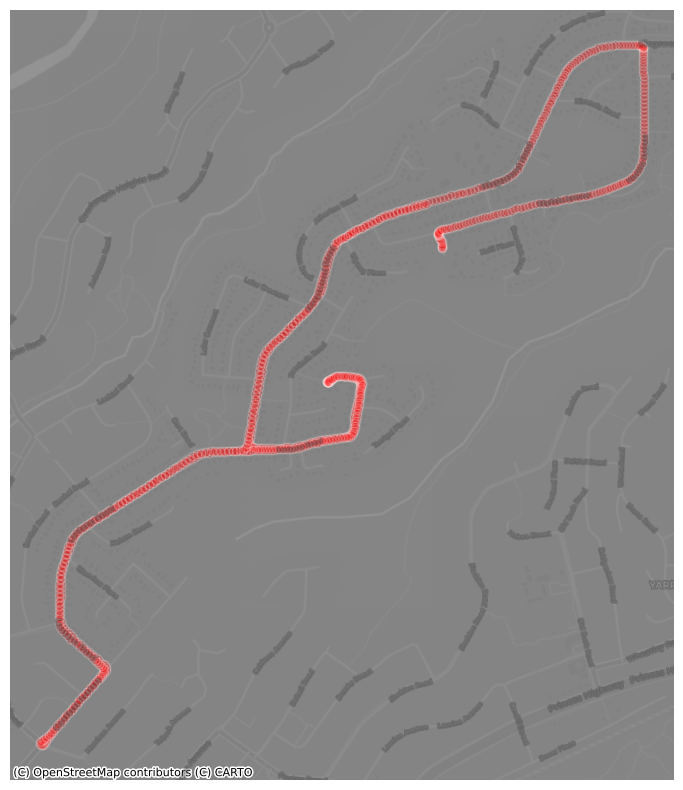

In [11]:
import matplotlib.pyplot as plt
import contextily as ctx

fig = plt.figure(figsize=(10,10))
ax = plt.axes()
gdf[gdf.gps_qual > 0].plot(ax=ax, alpha=.2, edgecolor="#ffff", color='red')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels, crs="EPSG:4326", alpha=.5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterOnlyLabels, crs="EPSG:4326", alpha=.5)
ax.set_axis_off()


In [15]:
import folium

m = folium.Map(location=(-22.9140008, -43.563634))

m

In [27]:


import folium, googlemaps, time
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime

coord_list = []

coord_list = [[lat, lon] for lat, lon in zip(gdf['latitude'], gdf['longitude'])]

#print(coord_list)

mapa = folium.Map(location= coord_list[0], zoom_start= 13)
marker = MarkerCluster().add_to(mapa)

MarkerCluster(locations=coord_list).add_to(mapa)
mapa

In [20]:
map_calor = folium.Map(location=coord_list[0], zoom_start=11)
HeatMap(coord_list, radius= 30).add_to(map_calor)
map_calor


# Data points de GPS coletados 
# utilizando tecnologia "legado",
# é necessário realizar a transferência
# dos dados após o uso a um dispositivo. 
# Não investiguei o suficiente para saber
# se possui conectividade WIFI. MAS
# não funciona bem em locais fechados
# por problema de sinal.




SyntaxError: invalid syntax (3794987051.py, line 6)

In [2]:
import datetime as dt
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
%matplotlib inline

# Specify dataset path to where you downloaded https://www.eurocrops.tum.de/downloads.html
dataset_dir = '/media/strk/C/data/'

# Get all paths
train_h5_dir  = os.path.join(dataset_dir, 'm1615987/HDF5s/train/')
train_csv_dir = os.path.join(dataset_dir, 'm1615987/csv_labels/train/')
test_h5_dir   = os.path.join(dataset_dir, 'm1615987/HDF5s/test/')
test_csv_dir  = os.path.join(dataset_dir, 'm1615987/csv_labels/test/')

# check they all exist
print(os.path.exists(test_csv_dir))
print(os.path.exists(test_h5_dir))
print(os.path.exists(train_csv_dir))
print(os.path.exists(train_h5_dir))


True
True
True
True


In [4]:
os.listdir(dataset_dir)

['m1615987', 'm1615987.zip']

In [31]:
# METHOD 2 - load the full HDF5
# load same file as above but with h5py rather than pd.HDFStore
h5_file = h5py.File(selected_file, 'r')
regions =  list(h5_file.keys())
print('Available regions: ' + str(regions))

Available regions: ['AT112', 'AT122', 'AT123', 'AT124', 'AT125', 'AT127', 'AT130', 'AT223']


In [44]:
selected_file = os.path.join(train_h5_dir, 'AT_T33UWP_train.h5')
h5obj = pd.read_hdf(selected_file, key='AT122')
h5obj.head(1)



20190106  \
171  [4001, 3264, 2454, 2224, 2228, 2243, 2275, 209...   

                                              20190111  \
171  [6089, 6142, 5377, 5935, 6231, 6410, 6446, 647...   

                                    20190113  \
171  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                              20190116  \
171  [5604, 5748, 5509, 6075, 6162, 6370, 6504, 629...   

                                    20190118  \
171  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                              20190205  \
171  [5837, 6230, 5971, 6729, 6883, 7059, 7094, 694...   

                                    20190207  \
171  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                    20190212  \
171  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                              20190215  \
171  [6010, 6433, 6243, 7032, 7162, 7223, 7090, 682...   

                                    20190217  ...  \
171  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  ...   

                                              20191018  \
171  [1234, 972, 839, 813, 1029, 1541, 1790, 1748, ...   

                                              20191023  \
171  [1223, 940, 828, 854, 1114, 1583, 1800, 1928, ...   

                                    20191025  \
171  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                              20191107  \
171  [1475, 1142, 957, 952, 1210, 1596, 1814, 1954,...   

                                              20191122  \
171  [1480, 1214, 1020, 1153, 1421, 1836, 2103, 216...   

                                    20191129  \
171  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                    20191204  \
171  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                              20191207  \
171  [7871, 7455, 6935, 7753, 8139, 8335, 8633, 804...   

                                    20191224  \
171  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                              20191227  
171  [6636, 6011, 5182, 5626, 5814, 5895, 6053, 575...  

[1 rows x 81 columns]

In [46]:
csv_file_path = os.path.join(train_csv_dir, 'demo_eurocrops_' + regions[1] + '.csv')
print(csv_file_path)
print("Exists:", os.path.exists(csv_file_path))

df_labels = pd.read_csv(csv_file_path, index_col=0)


/media/strk/C/data/m1615987/csv_labels/train/demo_eurocrops_AT122.csv
Exists: True


In [47]:
df_labels.head(5)

crpgrpc            crpgrpn
recno                             
171    33200000     pasture_meadow
460    33111022  leguminous_plants
468    33111022  leguminous_plants
475    33111022  leguminous_plants
516    33111022  leguminous_plants

In [48]:
# Pick the first row from the HDF data
example_row = h5obj.iloc[0]
recno = example_row.name

# Get the corresponding attribute data (from the CSV file)
crop_code = df_labels.loc[recno]['crpgrpc']
crop_type = df_labels.loc[recno]['crpgrpn']

print('Crop {} (of class {}) grows on rec_no {}'.format(crop_type, crop_code, recno))

Crop pasture_meadow (of class 33200000) grows on rec_no 171


In [49]:
h5obj.loc[recno]

20190106    [4001, 3264, 2454, 2224, 2228, 2243, 2275, 209...
20190111    [6089, 6142, 5377, 5935, 6231, 6410, 6446, 647...
20190113              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20190116    [5604, 5748, 5509, 6075, 6162, 6370, 6504, 629...
20190118              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                                  ...                        
20191129              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20191204              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20191207    [7871, 7455, 6935, 7753, 8139, 8335, 8633, 804...
20191224              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20191227    [6636, 6011, 5182, 5626, 5814, 5895, 6053, 575...
Name: 171, Length: 81, dtype: object

In [50]:
timesteps = list(h5obj.columns)
# Get the current year by taking the first timestep (all are from the same year)
year = int(timesteps[0][:4])
first_day_of_year = dt.datetime(year=year, month=1, day=1)

# Subtract start of the year from each time stamp to get the day of the year of each measure
tf = '%Y%m%d'
days_of_year = [((dt.datetime.strptime(date, tf) - first_day_of_year).days + 1) for date in timesteps]

# should be a list of values between 1-365
print(days_of_year)

[6, 11, 13, 16, 18, 36, 38, 43, 46, 48, 51, 56, 58, 66, 71, 73, 76, 78, 81, 83, 88, 91, 96, 106, 108, 111, 118, 121, 128, 138, 146, 151, 153, 156, 158, 163, 166, 168, 171, 176, 178, 181, 183, 186, 196, 198, 201, 206, 213, 216, 221, 223, 226, 228, 231, 241, 243, 246, 248, 251, 253, 256, 258, 261, 263, 266, 273, 281, 283, 286, 288, 291, 296, 298, 311, 326, 333, 338, 341, 358, 361]


In [53]:
np_er = example_row.to_numpy()
np_er_stack = np.stack(example_row, axis=0)

# get the dimension 1D, 2D, 3D
#np_er_stack.ndim 
# 80, 17
#np_er_stack.shape 

# check the first row
np_er_stack[1]



array([6089, 6142, 5377, 5935, 6231, 6410, 6446, 6479, 3691,  127, 3478,
       3412, 6556])

Text(0, 0.5, 'Reflectance value')

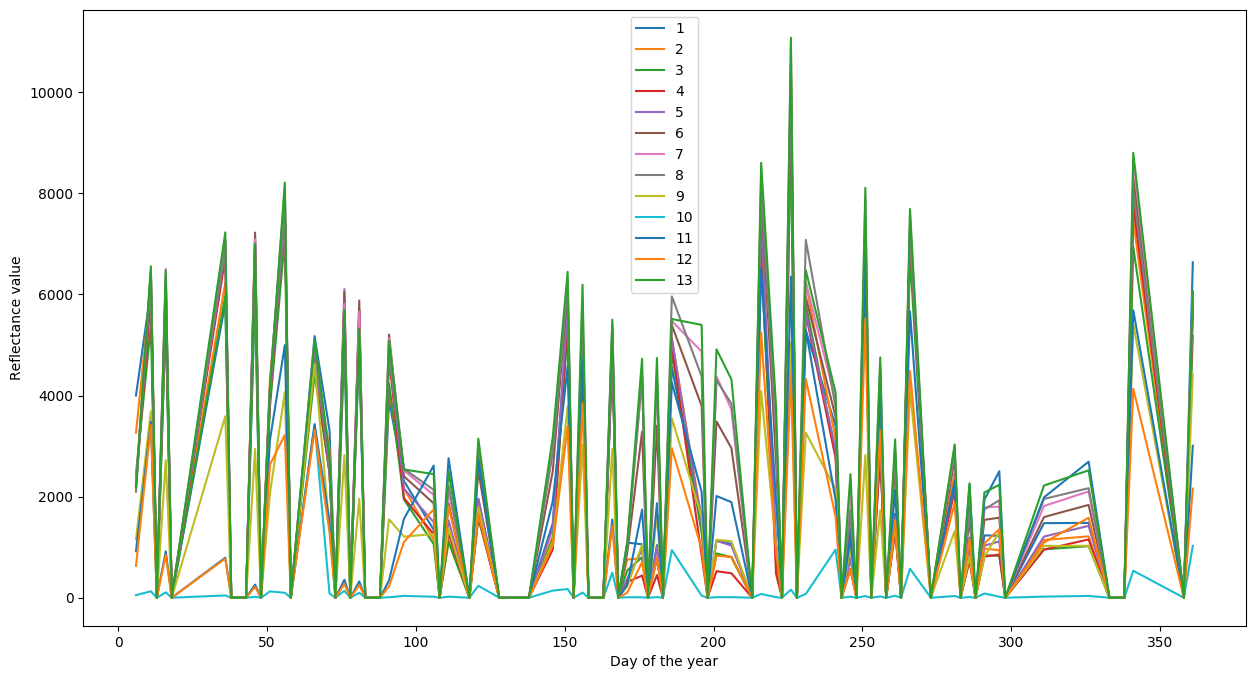

In [54]:
plt.rcParams['figure.figsize'] = [15, 8] # dimension of figure

# reflectance bands are not equally-spaced but we do so here for simplicity
# for more information see: https://gisgeography.com/sentinel-2-bands-combinations/
plt.plot(days_of_year, np_er_stack)
plt.legend(range(1,np_er_stack.shape[1]+1))
plt.style.use('_classic_test_patch')
plt.xlabel('Day of the year')
plt.ylabel('Reflectance value')
